# Analyzing the use of fertilizer over the years in Nepal


In this notebook i am going to analyze the fertilizer uses in My country. 


## Problem Definition

How is the import and export relationship of each type of fertilizer in My country Nepal over the years?


## Data

The dataset contains information on product amounts for the Production, Trade, Agriculture Use and Other Uses of chemical and mineral fertilizers products, over the time series 2002-present.
The fertilizer statistics data are validated separately for a set of over thirty individual products. Both straight and compound fertilizers are included.

The data has 11 columns:
1. Area Code
2. Area
3. Item Code
4. Item
5. Element Code
6. Element
7. Year Code
8. Year
9. Unit
10. Value
11. Flag

### Flags Column
Flag column has eight different values which means the followings:

* A - Aggregate; may include official; semi-official; estimated or calculated data;
* E - Expert sources from FAO (including other divisions);
* Fb - Data obtained as a balance;
* Fm - Manual Estimation;
* P - Provisional official data;
* Qm - Official data from questionnaires and/or national sources and/or COMTRADE (reporters);
* R - Estimated data using trading partners database;
* W - Data reported on country official publications or web sites (Official) or trade country files;

<img src='https://www4.gep.com/sites/default/files/blog-images/outlook-for-the-global-fertilizer-market.jpg'/>


## Preparing Tools

Study and understanding data properly is the challenging task in any data science problem. So external tools are the most to understand the data properly. Let's import some useful libraries.

In [1]:
# EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Load data
Loading the data using pandas.

In [2]:
df = pd.read_csv('/kaggle/input/fertilizers-by-product-fao/FertilizersProduct.csv',encoding='ISO-8859-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


From the total country extracting only the data of my country.

In [3]:
data_nepal = df[(df['Area']=='Nepal')].reset_index(drop=True)
data_nepal.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,149,Nepal,4007,"Ammonia, anhydrous",5610,Import Quantity,2003,2003,tonnes,1.50,Qm
1,149,Nepal,4007,"Ammonia, anhydrous",5610,Import Quantity,2009,2009,tonnes,20.12,Qm
2,149,Nepal,4007,"Ammonia, anhydrous",5610,Import Quantity,2010,2010,tonnes,31.47,Qm
3,149,Nepal,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,43.41,Qm
4,149,Nepal,4007,"Ammonia, anhydrous",5610,Import Quantity,2012,2012,tonnes,27.19,Qm


let's group the value so that we can clearly visualize in a single frame.

In [4]:
fertilizer_by_item = df.groupby(["Item"])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)

In [5]:
fig = px.pie(fertilizer_by_item, values=fertilizer_by_item['Value'], 
             names=fertilizer_by_item['Item'],
             title='Amount of Fertilizer used in Nepal',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

Now we can see that urea stood in the most used position in Nepal.

Since urea is the most imported fertilizer in Nepal. Lets explore more of it.

In [6]:
imported_urea = data_nepal.loc[(data_nepal['Item'] == 'Urea') & (data_nepal['Element'] == 'Import Value')]
imported_urea

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
503,149,Nepal,4001,Urea,5622,Import Value,2003,2003,1000 US$,3222.48,Qm
504,149,Nepal,4001,Urea,5622,Import Value,2009,2009,1000 US$,2197.27,Qm
505,149,Nepal,4001,Urea,5622,Import Value,2010,2010,1000 US$,29837.54,Qm
506,149,Nepal,4001,Urea,5622,Import Value,2011,2011,1000 US$,76933.80,Qm
507,149,Nepal,4001,Urea,5622,Import Value,2012,2012,1000 US$,39815.08,Qm
508,149,Nepal,4001,Urea,5622,Import Value,2013,2013,1000 US$,86107.99,Qm
509,149,Nepal,4001,Urea,5622,Import Value,2014,2014,1000 US$,57985.52,Qm
510,149,Nepal,4001,Urea,5622,Import Value,2015,2015,1000 US$,83825.38,Qm
511,149,Nepal,4001,Urea,5622,Import Value,2016,2016,1000 US$,67202.11,Qm
512,149,Nepal,4001,Urea,5622,Import Value,2017,2017,1000 US$,67772.37,Qm


In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=imported_urea['Year'], y=imported_urea['Value'],
                    mode='lines',
                    name='Urea',marker_color='green'))

fig.update_layout(
    title='Import of urea over the years in Nepal (US$1000)',
        template='plotly_dark'

)

fig.show()

Yeah, the use of urea increased from 2009 after that it is fluctuate over the time.

The second most used fertilizer in Nepal is Potassium chloride (muriate of potash) (MOP). Lets compare them.

In [8]:
cost_of_imported_urea = imported_urea['Value'].sum()
print('Total amount of money spend in Urea since 2002: Rs.{:.2f}'.format(cost_of_imported_urea*121.27))

Total amount of money spend in Urea since 2002: Rs.62441867.22


In [9]:
imported_potassium = data_nepal.loc[(data_nepal['Item'] == 'Potassium chloride (muriate of potash) (MOP)') & (data_nepal['Element'] == 'Import Value')]
imported_potassium

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
344,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2003,2003,1000 US$,0.62,Qm
345,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2011,2011,1000 US$,847.05,Qm
346,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2013,2013,1000 US$,92.68,Qm
347,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2014,2014,1000 US$,0.24,Qm
348,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2015,2015,1000 US$,0.03,Qm
349,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2016,2016,1000 US$,0.02,Qm
350,149,Nepal,4016,Potassium chloride (muriate of potash) (MOP),5622,Import Value,2017,2017,1000 US$,6.20,Qm


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=imported_urea['Year'], y=imported_urea['Value'],
                    mode='lines',
                    name='Urea'))

fig.add_trace(go.Scatter(x=imported_potassium['Year'], y=imported_potassium['Value'],
                    mode='lines',
                    name='Potassium Chloride',line=dict(dash='dot')))


fig.update_layout(
    title='Comparison between Urea and Potassium Chloride',
    template='plotly_dark',

)

fig.show()

In [11]:
fig = go.Figure(data=[go.Bar(
            x=fertilizer_by_item['Item'][0:10], y=fertilizer_by_item['Value'][0:10],
            text=fertilizer_by_item['Value'][0:10],
            textposition='auto',
            marker_color='red',
 
        )])
fig.update_layout(
    title='10 Most Used Fertilizer since 2002 in Nepal',
    xaxis_title="Items",
    yaxis_title="Value",
    template='plotly_dark'
)
fig.show()

These are the top 10 most used fertilizers in Nepal:
    
1. Urea
2. Potassium Chloride
3. Phosphate rock
4. NPK fertilizes
5. Diammonium Phosphate(DAP)
6. Ammonia,anhydrous
7. Ammonium sulphate
8. Ammonium Nitrate
9. Urea and Ammonium nitrate solutions
10. Monoammonium phosphate
    

Evolution of importing and exporting of fertilizer over nepal from 2003 to 2017.

Text(0.5, 1.0, 'Import/Export of fertilizer over the years')

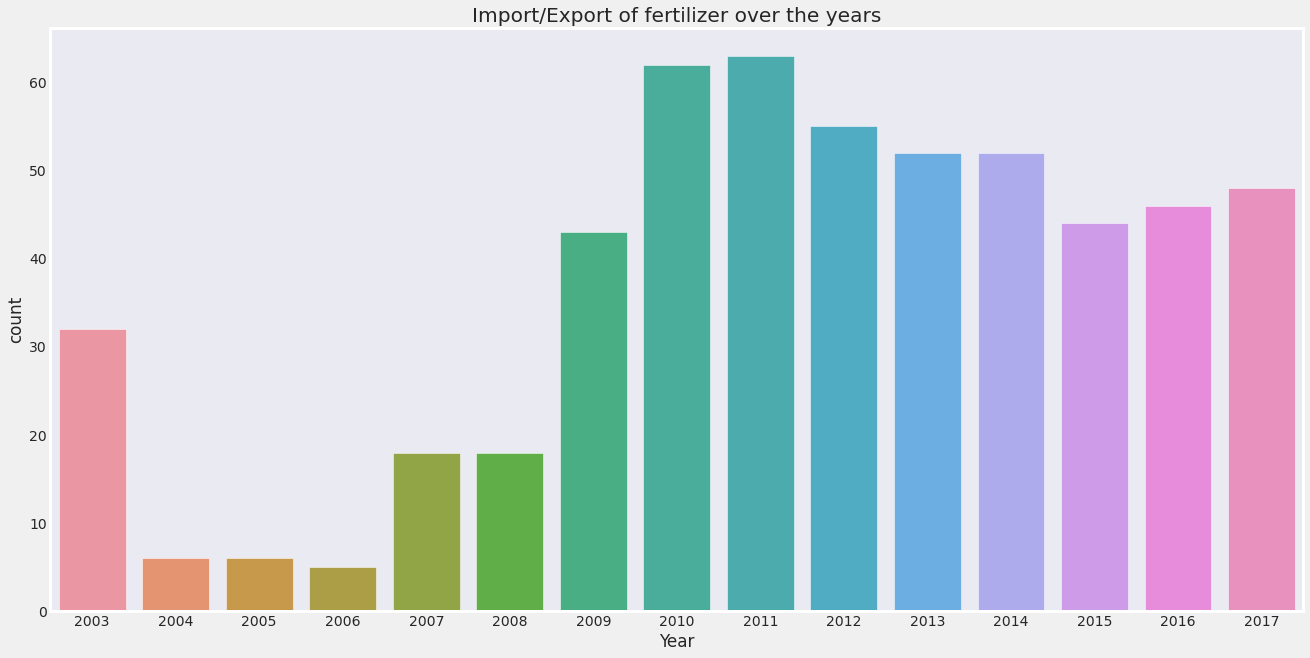

In [12]:
plt.figure(figsize=(20,10))
sns.set_style('dark')
sns.countplot(x='Year',data=data_nepal);
plt.title('Import/Export of fertilizer over the years')

The maximum import export has happenned in 2011 where as the lowest in 2006. The import-export seems to be decreased in the period of 2003 to 2008 where as it increased from 2009 and slightly decreasing from 2011.
From 2009 it is seem that around 50 tonnfertilizer are imported-exported in every year in Nepal.

In [13]:
fig = px.pie(data_nepal,values=data_nepal['Element'].value_counts().values,
             names=df['Element'].unique(),
             title='Import and Export amount of fertilizer in Nepal',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

From the pie we can clearly say that is believes in importing the fertilizer rather than exporting. This is the reason why we are fuckin poor.

Lets see what we are producing.

In [14]:
nepal_production = data_nepal.loc[data_nepal['Element'] == 'Production']
nepal_production.sort_values(by=['Value'], ascending=False)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
22,149,Nepal,4003,Ammonium nitrate (AN),5510,Production,2007,2007,tonnes,0.0,Qm
388,149,Nepal,4017,Potassium sulphate (sulphate of potash) (SOP),5510,Production,2009,2009,tonnes,0.0,Qm
437,149,Nepal,4012,Superphosphates above 35%,5510,Production,2010,2010,tonnes,0.0,Qm
436,149,Nepal,4012,Superphosphates above 35%,5510,Production,2009,2009,tonnes,0.0,Qm
435,149,Nepal,4012,Superphosphates above 35%,5510,Production,2008,2008,tonnes,0.0,Qm
...,...,...,...,...,...,...,...,...,...,...,...
113,149,Nepal,4022,Diammonium phosphate (DAP),5510,Production,2016,2016,tonnes,0.0,Qm
112,149,Nepal,4022,Diammonium phosphate (DAP),5510,Production,2015,2015,tonnes,0.0,Qm
111,149,Nepal,4022,Diammonium phosphate (DAP),5510,Production,2014,2014,tonnes,0.0,Qm
110,149,Nepal,4022,Diammonium phosphate (DAP),5510,Production,2013,2013,tonnes,0.0,Qm


we dont't believe in production rather we prefer to import.

In [15]:
fig = px.area(nepal_production, x="Year", y="Value", color="Item", line_group="Item", title='Production of fertilizers in Nepal')
fig.show()

Look how reach we are hahaha!!!!

